In [1]:
####################################### 1 ###############################################

In [78]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from numpy import count_nonzero
from datetime import datetime, date

In [79]:
ReAdmission_df=pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

In [4]:
Patients_df=pd.read_excel("HospitalDatabase.xlsx","Patients")

In [5]:
Discharges_df=pd.read_excel("HospitalDatabase.xlsx","Discharges")

In [6]:
EDVisits_df=pd.read_excel("HospitalDatabase.xlsx","EDVisits")

In [7]:
EDUnique_df=pd.read_excel("HospitalDatabase.xlsx","EDUnique")

In [8]:
Providers_df=pd.read_excel("HospitalDatabase.xlsx","Providers")

In [9]:
AmbulatoryVisits_df = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

###  Q1.  Make a pair plot on Readmission Registry table & do u see any correlation between columns values

C:\Users\deeps\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

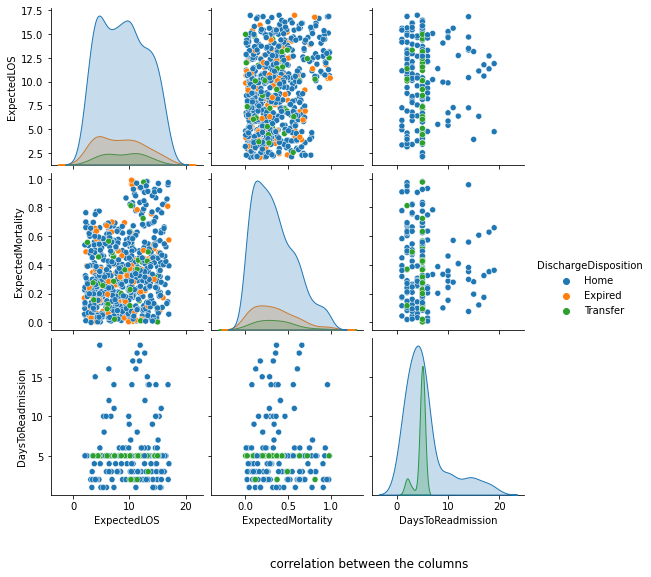

In [10]:
plt.figure(figsize=(10,6))
sns.pairplot(ReAdmission_df, vars=['ExpectedLOS', 'ExpectedMortality',  'DaysToReadmission'],hue='DischargeDisposition')
plt.title('correlation between the columns',y=-0.50,x=-0.02)
plt.show()

Based on the pair plot on DischargeReadmission sheet could not find any columns highly correlated.Expected Morality and Expected Los are slightly corelated.

### Q2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [11]:
Patients_df.iloc[101:200,[1,2]]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


###  Q3.Create a figure object called fig using plt.figure() **
###    Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
###     Plot (x,y) on that axes and set the labels.
###     Note : You can plot on any x,y set of values

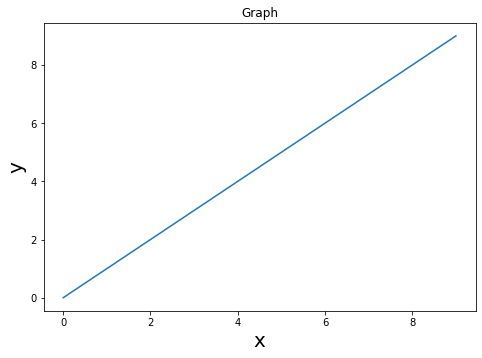

In [12]:
x = range(0, 10)
y = range(0, 10)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)

ax.set_xlabel("x",fontsize=20)

ax.set_ylabel("y",fontsize=20)

ax.set_title("Graph")
plt.show()

### Q4.Display Data By splitting age in 4 quartiles and labeling the quartiles

In [13]:
Patients_df['Converted_dob']=Patients_df['DateOfBirth'].dt.strftime("%d/%m/%Y")

In [14]:
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
Patients_df['Age'] = Patients_df['Converted_dob'].apply(age)

In [15]:
Quartile_Age =Patients_df['Age'].quantile([ 0.25,  0.5, 0.75,1])
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label
Quartile_Age

1st Quantile    42.0
2nd Quantile    48.0
3rd Quantile    55.0
4th Quantile    62.0
Name: Age, dtype: float64

###  Q5. Display full name of patients who are born in 1986

In [16]:
#importing warnings library to avoid printing Warning message on the notebook
import warnings

warnings.filterwarnings("ignore")

In [17]:
# reading dataofbirth column values
Patients_df['dob'] = Patients_df.DateOfBirth


In [18]:
Patients_df['year1'] = pd.DatetimeIndex(Patients_df['dob']).year


In [19]:
data_1986 = Patients_df[pd.DatetimeIndex(Patients_df.DateOfBirth).year==1986]
data_1986['FullName']=data_1986['FirstName']+ '' + data_1986['LastName']
data_1986['FullName']

23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
Name: FullName, dtype: object

### Q6. Create a jointplot on expected mortality & expected length of stay

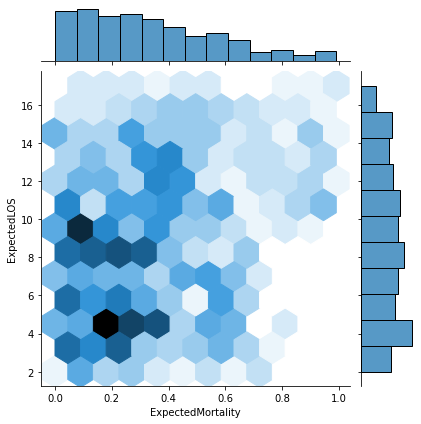

In [20]:
sns.jointplot(x='ExpectedMortality' ,y ='ExpectedLOS' ,data=Discharges_df, kind='hex')
plt.show()

This plot shows the correlation between ExpectedLOS and ExpectedMortality.Darker the colour means more points fall into that category.

###  Q7. Create a pair plot by taking parameter "hue" as EDDisposition

Text(-0.02, -0.5, 'Pair plot by EDDisposition')

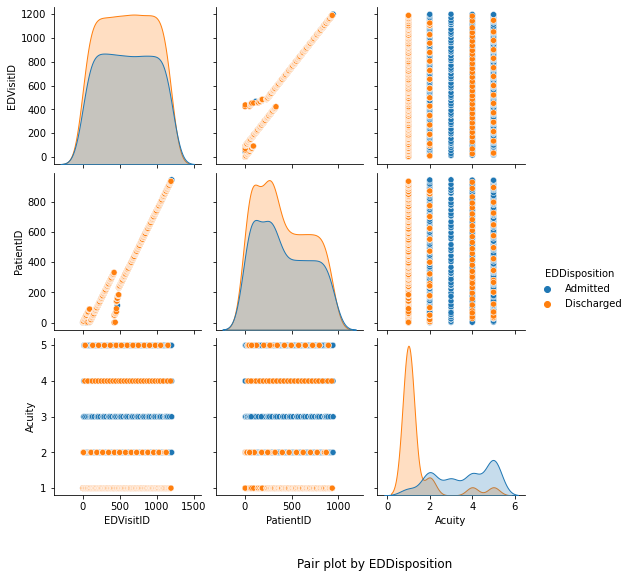

In [21]:
sns.pairplot(EDVisits_df,hue='EDDisposition')
plt.title('Pair plot by EDDisposition',y=-0.50,x=-0.02)

### Q8. Create a bar chart between expectedLOS & Primary diagnosis

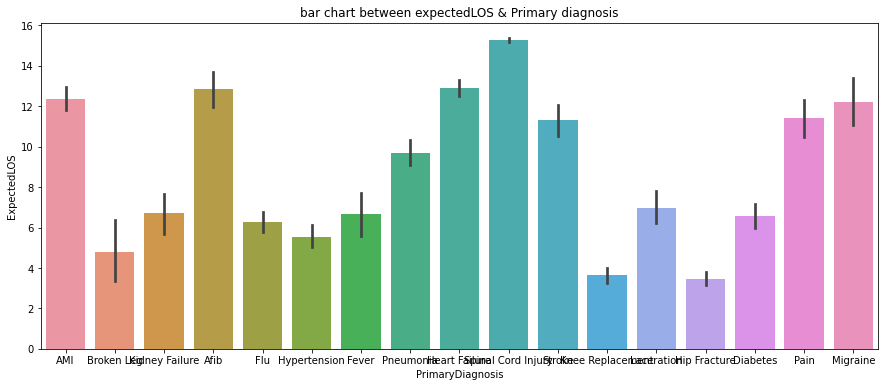

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(y='ExpectedLOS' ,x ='PrimaryDiagnosis' ,data=Discharges_df)
plt.title('bar chart between expectedLOS & Primary diagnosis')
plt.show()

### Q9. Get the list of patient ids which are not there in ReadmissionRegistry

In [23]:
dpatientid = Patients_df['PatientID']
readmissionid = ReAdmission_df['PatientID'].drop_duplicates()

In [24]:
# Patient id not readmitted
Patinentid_nt = dpatientid[~dpatientid.isin(readmissionid)].dropna()

In [25]:
print(Patinentid_nt.count())

241


In [26]:
# patient id not readmitted
print(Patinentid_nt) 

3        4
134    135
144    145
188    189
199    200
      ... 
940    941
941    942
942    943
943    944
944    945
Name: PatientID, Length: 241, dtype: int64


### Q10. Create a boxplot on ExpectedLOS by taking service into account

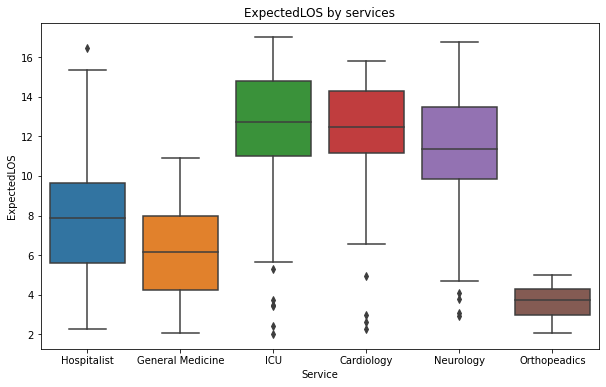

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Service',y='ExpectedLOS',data=ReAdmission_df)
plt.title('ExpectedLOS by services')
plt.show()

Understandings: Expected LOS is less for Orthopeadics and more for ICU. We see Outliers in 4 type of services (hospitality,ICU,cardiology,neurology)

### Q11. Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] &                                                         EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

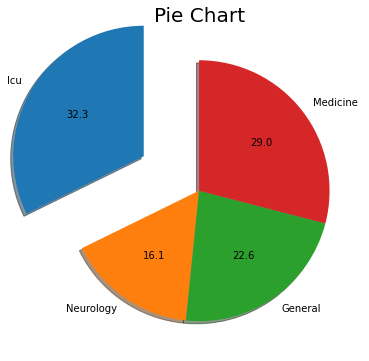

In [28]:
plt.figure(figsize=(10,6))
Service= ["Icu", "Neurology", "General", "Medicine"]
EcpectedLOS=[10,5,7,9]
outside = (0.5, 0, 0, 0)
plt.pie(EcpectedLOS, labels=Service, explode=outside, autopct="%.1f", shadow=True, startangle=90) 
plt.title("Pie Chart", fontsize=20)
plt.show()

### Q12.Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T


In [29]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [30]:
import psycopg2 as pst


In [31]:
#conn=pst.connect("dbname='Hospital Database' user=postgres password =admin")

In [34]:
#sqldata_df = pd.read_sql("""select * from "Providers" where ProviderName like 'T%'""",conn )
#sqldata_df

### Q13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x  with 2 rows & 2 columns with object oriented approach

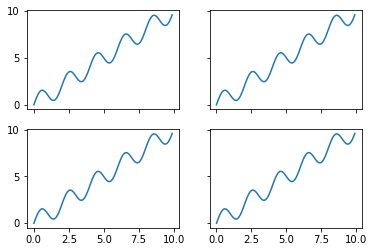

In [35]:
#import numpy as np
#import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y = np.sin(np.pi * x) + x
rows=2
cols=2

fig, axes = plt.subplots(rows, cols,sharex='col', sharey='row')
for row in range(rows):
    for col in range(cols):
        axes[row, col].plot(x,y)

plt.show()


### Q14. To find the number of null values in BloodPressureSystolic column

In [36]:
# reading the Ambulatory Visits file to get BloodPressureSystolic column
#to check whether the column as null data
BP = AmbulatoryVisits_df['BloodPressureSystolic'].isnull()
print(BP)

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool


In [37]:
#to check how many null values in the column
BP = AmbulatoryVisits_df['BloodPressureSystolic'].isnull().sum()
print(BP)

124


### Q15. Replace all the null values in ReadmissionFlag with 0

In [38]:
# to check how many records has null values
readmissionflag = ReAdmission_df['ReadmissionFlag'].isnull().sum()
print(readmissionflag)

526


In [39]:
#updating the null to zero
ReAdmission_df['ReadmissionFlag'].fillna(value=0, inplace=True)

In [40]:
#checked whether all records got updated
readmissionflagupdated = ReAdmission_df['ReadmissionFlag'].isnull().sum()
print(readmissionflagupdated)

0


In [41]:
#verified the output
ReAdmission_df['ReadmissionFlag']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

### Q16.Plot a graph to showthe distribution of expected length of stay

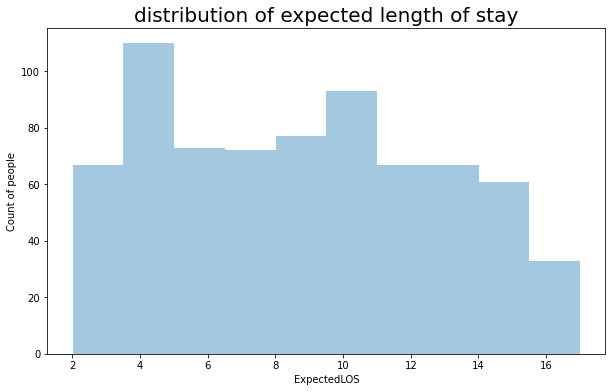

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(ReAdmission_df['ExpectedLOS'],kde=False,bins=10)
plt.title('distribution of expected length of stay',fontsize=20)
plt.ylabel('Count of people')
plt.show()

 From the plot we know that More number of people are staying 4 to 5 days in the hospital.

### Q17.Create a heat map to show the correlation between the column values of Edvisits

In [43]:
# calculating the corerelation for EDVisits
Edc=EDVisits_df.corr()

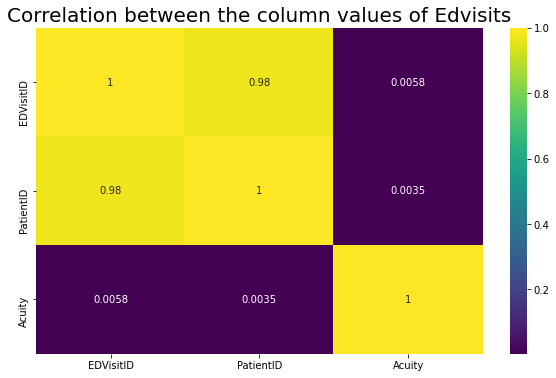

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(Edc,annot=True,cmap='viridis')
plt.title("Correlation between the column values of Edvisits", fontsize=20)
plt.show()

 Dark purple colour means less correlation,yellow colour means more correlation.

### Q18.Add column 'Age' in Patient table

In [45]:
Patients_df['Date'] = pd.to_datetime(Patients_df.DateOfBirth)
Patients_df['Date']

0     1960-01-01 00:00:00.000000
1     1985-11-15 02:08:42.089852
2     1976-04-15 02:52:09.762384
3     1968-10-15 03:32:13.634776
4     1962-05-01 19:12:58.949547
                 ...            
940   1986-05-26 00:01:19.761035
941   1970-06-10 21:41:03.814278
942   1983-01-08 21:49:27.883969
943   1963-06-05 07:57:05.569185
944   1972-08-06 03:40:03.454345
Name: Date, Length: 945, dtype: datetime64[ns]

In [46]:
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [47]:
df7=Patients_df['Date'].apply(lambda x: from_dob_to_age(x))

In [48]:
# dataframe for patients table
df9=pd.read_excel("HospitalDatabase.xlsx","Patients")

In [49]:
df9['age']=df7
df9

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761035,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814278,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1983-01-08 21:49:27.883969,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569185,Male,Black/African-American,English,58


### Q19 Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [50]:
 #reading the discharge date from ReAdmissionRegistry sheet
require_cols = [3]
ReAdmission_df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry',usecols = require_cols)
ReAdmission_df['DischargeDate']

0     2018-01-04 19:59:31.390889
1     2018-01-04 21:28:51.897839
2     2018-01-04 22:28:23.672392
3     2018-01-05 05:47:04.932834
4     2018-01-05 14:18:30.029460
                 ...            
715   2018-03-07 21:22:10.061111
716   2018-03-08 02:43:18.749374
717   2018-03-08 09:27:18.377021
718   2018-03-10 06:06:12.068108
719   2018-03-10 20:38:30.568130
Name: DischargeDate, Length: 720, dtype: datetime64[ns]

In [51]:
# splitting date and time from the column discharge date
ReAdmission_df['Dates']=pd.to_datetime(ReAdmission_df['DischargeDate']).dt.date
ReAdmission_df['Time']=pd.to_datetime(ReAdmission_df['DischargeDate']).dt.time
ReAdmission_df

,DischargeDate,Dates,Time
0,2018-01-04 19:59:31.390889,2018-01-04,19:59:31.390889
1,2018-01-04 21:28:51.897839,2018-01-04,21:28:51.897839
2,2018-01-04 22:28:23.672392,2018-01-04,22:28:23.672392
3,2018-01-05 05:47:04.932834,2018-01-05,05:47:04.932834
4,2018-01-05 14:18:30.029460,2018-01-05,14:18:30.029460
...,...,...,...
715,2018-03-07 21:22:10.061111,2018-03-07,21:22:10.061111
716,2018-03-08 02:43:18.749374,2018-03-08,02:43:18.749374
717,2018-03-08 09:27:18.377021,2018-03-08,09:27:18.377021
718,2018-03-10 06:06:12.068108,2018-03-10,06:06:12.068108


### Q20.Count of number of patients admitted based on Primary Diagnosis and Service provided

In [52]:
data = Discharges_df.groupby(['PrimaryDiagnosis','Service'],as_index=True)['PatientID'].count()
data

PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

### Q21.Which demographic patients are prone to get stroke

In [67]:
Patientid_stroke = ReAdmission_df['PatientID'][ReAdmission_df.PrimaryDiagnosis =='Stroke']
Patients_detail = Patients_df.iloc[:,0:6][Patients_df['PatientID'].isin(Patientid_stroke)]

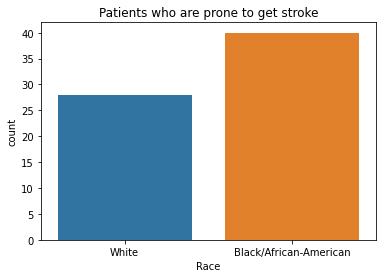

In [68]:
sns.countplot(x='Race', data =Patients_detail)
plt.title('Patients who are prone to get stroke')
plt.show()

 Graph shows Black/African American is more prone to get stroke

### Q22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value


In [69]:
count_patient_df_2= EDVisits_df.groupby(['EDDisposition','Acuity'],as_index=True)['PatientID'].count()
count_patient_df_2

EDDisposition  Acuity
Admitted       1          32
               2         116
               3          81
               4         107
               5         179
Discharged     1         558
               2          66
               4          30
               5          30
Name: PatientID, dtype: int64

### We have tried as_index=false and .set_index() to set index manually outside the group by

In [70]:
# used groupby() to get the count of patients and writing it to dataframe
data= EDVisits_df.groupby(['EDDisposition','Acuity'],as_index=False)['PatientID'].count()
count_patient_df = pd.DataFrame(data)

In [71]:
# setting index on EDDisposition and Acuity
count_patient_df = count_patient_df.set_index(['EDDisposition','Acuity'])

In [72]:
# printing the values
count_patient_df

PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30

### Q23.Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [74]:
def findMiddle(input_list):
    middle = float(len(input_list))/2
    if middle % 2 != 0:
        return input_list[int(middle - .5)]
    else:
        return (input_list[int(middle-1)],input_list[int(middle)])

input_list=list(input("enter some numbers:"))
findMiddle(input_list)

enter some numbers:65454


'4'

### Q24.Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [75]:
data = EDVisits_df.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()
stack_df = pd.DataFrame(data)

Stack_pivot_df =stack_df.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot_df

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


In [76]:
Stack_pivot_df.stack()


EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Fever                   46.0
               Gun Shot                16.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Bleeding                15.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Intoxication            30.0
               Laceration              30.0
               Migraine               109.0
               Pneumonia               65.0
               Shortness of Breath     77.0
               Stomach Ache           154.0
dtype: float64

#### Stacked output

In [77]:
stacked_df = Stack_pivot_df.stack()
stacked_df.unstack()

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


#### Unstacked output

### Q25.Plot a graph by counting the no. of patients in each department

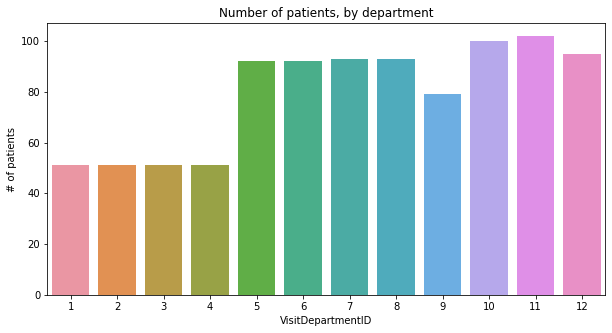

In [80]:
plt.figure(figsize = (10,5))
sns.countplot(x='VisitDepartmentID',data = AmbulatoryVisits_df)
plt.title('Number of patients, by department')
plt.ylabel('# of patients')
plt.show()

### Q26. Using Arrays and Loops, find the count of of patients based on gender

In [81]:
a=np.array(Patients_df['Gender'])
m_value=0
f_value=0
for i in a:
    if i == 'Male':
        m_value = 1 + m_value
    else:  
        f_value = 1 + f_value
print( 'count of Male Patients :',m_value)
print( 'count of Female Patients :',f_value)

count of Male Patients : 537
count of Female Patients : 408


### Q27.Plot a graph to count the patients based on discharge disposition

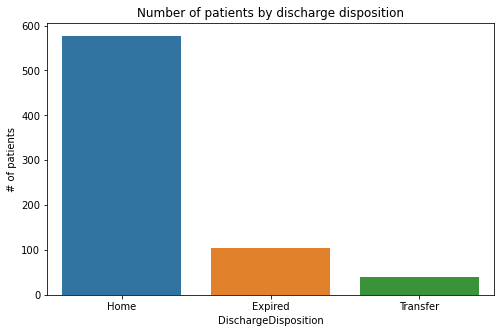

In [82]:
plt.figure(figsize = (8,5))
sns.countplot(x='DischargeDisposition',data =ReAdmission_df)
plt.title('Number of patients by discharge disposition')
plt.ylabel('# of patients')
plt.show()

### Q28.Which reason of visit has maximum mortality rate

In [83]:
Patient_count= Discharges_df.groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
# this is to get total number of patients for each PrimaryDiagnosis
Patient_count.rename(columns={"PatientID":"Total_count"},inplace = True)
Expired_patient_count = Discharges_df[(Discharges_df.DischargeDisposition=='Expired')].groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
Expired_patient_count.rename(columns={"PatientID":"Death_count"},inplace = True)
# Merging the file on PrimaryDiagnosis column
Patient_count_df = pd.merge(Patient_count,Expired_patient_count, on = "PrimaryDiagnosis", how = 'left')
Patient_count_df['Death_count'].fillna(value=0, inplace=True)
#calculation actual Morality rate
Patient_count_df['Mortality_rate']=Patient_count_df['Death_count']/Patient_count_df['Total_count']

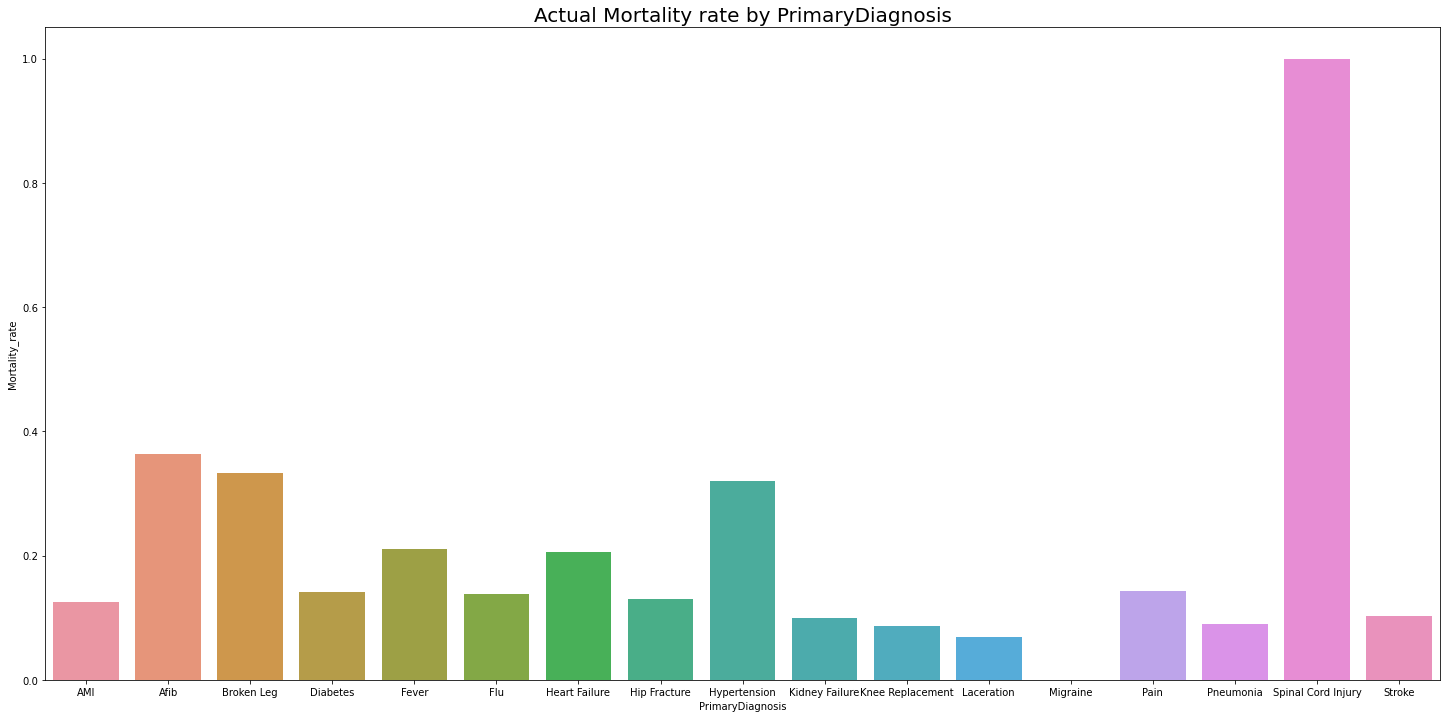

In [84]:
plt.figure(figsize = (25,12))
sns.barplot(x='PrimaryDiagnosis',y='Mortality_rate',data = Patient_count_df)
plt.title('Actual Mortality rate by PrimaryDiagnosis',fontsize=20)
plt.show()

 Spinal Cord Injury has high Mortality rate

### Q29. Calculate average LOS

In [85]:
#average Los is calculated by using mean() function on 'ExpectedLOS' column
avg_LOS = Discharges_df['ExpectedLOS'].mean()
print('Average LOS is :',avg_LOS)

Average LOS is : 8.824589159156147


In [86]:
#To verify we cross checked with describe()
Discharges_df['ExpectedLOS'].describe()

count    720.000000
mean       8.824589
std        4.034421
min        2.012974
25%        5.138501
50%        8.633825
75%       12.107623
max       16.998213
Name: ExpectedLOS, dtype: float64

### Q30.Which patientid has most entries in readmission registry

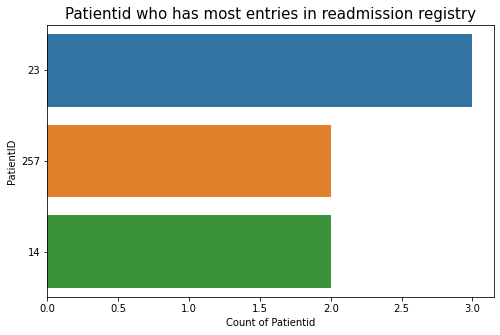

In [87]:
# used the count plot and ordered by value_counts() to get top 3 records.
plt.figure(figsize = (8,5))
sns.countplot(y='PatientID', data =ReAdmission_df, order= ReAdmission_df.PatientID.value_counts().iloc[:3].index)
plt.xlabel('Count of Patientid')
plt.title('Patientid who has most entries in readmission registry',fontsize=15)
plt.show()

 From the above graph, PatientID 23 has most entries in readmission registry

### Q31.Find count of White Spanish Male

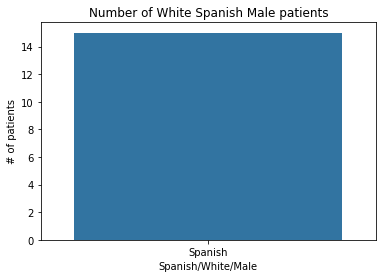

In [89]:
sns.countplot(x='Language',data =Patients_df[(Patients_df.Gender == 'Male') & (Patients_df.Race =='White') &(Patients_df.Language == 'Spanish') ] )
plt.title('Number of White Spanish Male patients')
plt.xlabel('Spanish/White/Male')
plt.ylabel('# of patients')
plt.show()

 The Graph Shows we have 15 Patients who are White Spanish Male

In [90]:
Patients_df.PatientID[(Patients_df.Gender == 'Male') & (Patients_df.Race =='White') &(Patients_df.Language == 'Spanish')] .count()

15

 cross verified against dataframe 

### Q32.Write a function to print the table of the given number

In [92]:
def print_table(num, start, end): 
    """ This function prints multiplication table of a given number"""
    for i in range(start, end+1): 
        print(num,' x ', i, ' = ',num*i) 
# end of function table


# input a number
n = int(input("Please Enter a number to print its multiplication table:"))
start = int(input("Enter  start value to start printing table from:"))
end =  int(input("Enter  end value to stop printing table:"))
# call the function table by passing actual parameter 'n' 

print_table(n, start, end)

Please Enter a number to print its multiplication table:6
Enter  start value to start printing table from:2
Enter  end value to stop printing table:8
6  x  2  =  12
6  x  3  =  18
6  x  4  =  24
6  x  5  =  30
6  x  6  =  36
6  x  7  =  42
6  x  8  =  48


### Q33. Using a bar chart, which Service had the lowest count of Expected Mortality?

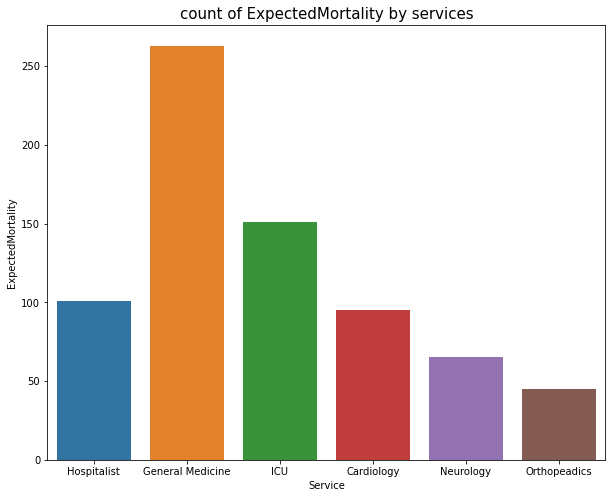

In [93]:
plt.figure(figsize = (10,8))
sns.barplot(x='Service', y ='ExpectedMortality', data = ReAdmission_df, estimator= count_nonzero)
plt.title('count of ExpectedMortality by services',fontsize =15)
plt.show()

From the above bar chart we come to know Orthopeadics Service had the lowest count of Expected Mortality

### Q34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [95]:
a=np.arange(1,31).reshape(6,5)
a[2:4,0:2]

array([[11, 12],
       [16, 17]])

### Q35.np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [99]:
a=np.arange(1,31).reshape(6,5)
print(a[(0,1)])


2


In [100]:
print(a[(1,2)])


8


In [101]:
print(a[(2,3)])

14


In [102]:
print(a[(3,4)])

20


In [103]:
# another method to print 2,8,14,20
a[[0,1,2,3],[1,2,3,4]]

array([ 2,  8, 14, 20])

### Q36 Create a correlation matrix on EDVisits

In [104]:
EDVisits_corr_df=EDVisits_df

In [105]:
EDVisits_corr_df['EDDisposition'] = np.where((EDVisits_corr_df.EDDisposition == 'Admitted'),1,0)

In [106]:
cc=EDVisits_corr_df.corr()
cc

,EDVisitID,PatientID,Acuity,EDDisposition
EDVisitID,1.000000,0.975477,0.005813,0.006640
PatientID,0.975477,1.000000,0.003545,0.007777
Acuity,0.005813,0.003545,1.000000,0.675967
EDDisposition,0.006640,0.007777,0.675967,1.000000


There is only 1 numeric column to find the correlation, so tried to change EDDispotion to numeric. from above correlation matrix we couldnt say which is correlated. but EDDispotion and Acuty is slightly correlated. 

In [107]:
EDVisits_corr_df['time difference'] =(EDVisits_corr_df['EDDischargeTime']-EDVisits_corr_df['VisitDate']).dt.total_seconds() / 60 / 60

In [108]:
EDVisits_corr_df.corr()

,EDVisitID,PatientID,Acuity,EDDisposition,time difference
EDVisitID,1.000000,0.975477,0.005813,0.006640,0.015873
PatientID,0.975477,1.000000,0.003545,0.007777,0.020262
Acuity,0.005813,0.003545,1.000000,0.675967,-0.033968
EDDisposition,0.006640,0.007777,0.675967,1.000000,-0.061439
time difference,0.015873,0.020262,-0.033968,-0.061439,1.000000


Tried to check correlation including length of stay but it is not correlated.EDDisposition & Acuity is slightly correlated.

### 37.Write a function to print all the upper case letter of a given sentence

In [109]:
# Python program to print uppercase letters in the string

# take input
string = input('Enter any string: ')

upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

Enter any string: HACkathon
Uppercase characters: HAC


### Q38. Number of patients on 'Transfer' based on primary diagnosis

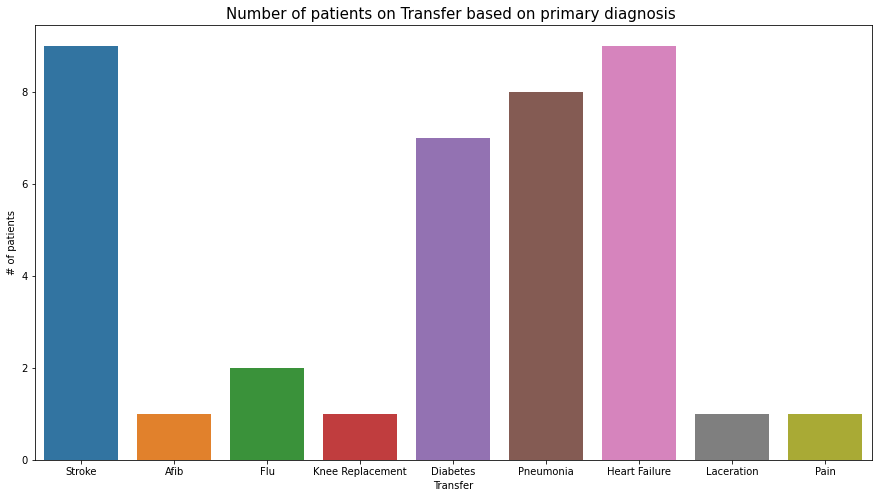

In [110]:
plt.figure(figsize = (15,8))
sns.countplot(x='PrimaryDiagnosis',data =ReAdmission_df[(ReAdmission_df.DischargeDisposition == 'Transfer')])
plt.title('Number of patients on Transfer based on primary diagnosis ',fontsize=15)
plt.xlabel('Transfer')
plt.ylabel('# of patients')
plt.show()


### Q39.Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine

In [111]:
#Filtering data on Migraine
Pid_Migraine = EDUnique_df['PatientID'][(EDUnique_df.ReasonForVisit == 'Migraine') ]

In [112]:
# to display number of Patients who has Migraine and valided against data set
Pid_Migraine.count()

116

In [113]:
# Passing those Patient_id to Patient table and getting their details. 
Patients_df.iloc[:,1:4][Patients_df['PatientID'].isin(Pid_Migraine)]

,FirstName,LastName,DateOfBirth
1,Far,Myers,1985-11-15 02:08:42.089852
2,Devlin,Michael,1976-04-15 02:52:09.762384
11,Zonnya,Ab,1963-05-23 10:04:33.074196
13,Gan,Yu,1970-06-02 06:22:54.675324
21,Joesph,Long,1979-12-04 16:45:56.080016
...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.482935
907,Knox,Group,1975-08-25 22:27:50.176839
909,Kuvalis,Coupland,1986-05-23 19:23:27.751803
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178022


 Verified it gets only details of 116 records who have Migraine.

### Q40. Plot a graph showing the count of patients for the reason visited the hospital.

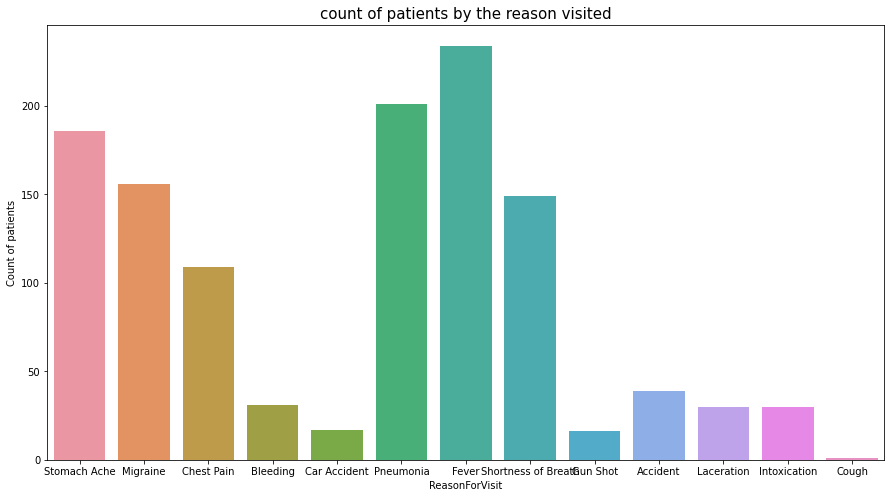

In [115]:
plt.figure(figsize = (15,8))
sns.countplot(x='ReasonForVisit',data=EDVisits_df)

plt.ylabel('Count of patients')
plt.title('count of patients by the reason visited',fontsize=15)
plt.show()

In [181]:
####################################### 41 ####################################################

### Q41. Find the visit type with maximum 'No Show'


In [182]:
# Reading  HospitalDatabase file's sheet 'AmbulatoryVisits'  

df41AV = AmbulatoryVisits_df

In [183]:
# To check no. of unique values in column VisitType
df41AV["VisitType"].unique()

array(['Physical', 'Follow Up', 'Telemedicine', 'New'], dtype=object)

In [184]:
# To extract  column name 'VisitStatus' into a seperate dataframe
df41vs = df41AV.groupby("VisitStatus")

In [185]:
# To extract values from dataframe 'VisitStatus' based on condition with 'NoShow'
df41NS = df41vs.get_group("No Show")
df41NS

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.042525,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656371,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.695747,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.616969,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
149,414,90,3,2019-02-25,2019-02-17 14:34:07.328102,5,Follow Up,136.0,90.802316,79.426026,No Show
150,507,891,16,2019-01-25,2019-01-14 03:04:39.696486,11,Telemedicine,155.0,112.064259,73.714965,No Show
151,410,90,22,2019-02-21,2019-01-31 11:29:47.000305,1,Follow Up,131.0,80.726116,54.947675,No Show
152,803,888,15,2019-03-07,2019-02-25 11:54:27.274418,8,Telemedicine,173.0,136.377032,58.024363,No Show


In [186]:
# To extract max count of the VisitType field from dataframe 'NoShow' 
df41=df41NS["VisitType"].unique().max()
df41

'Telemedicine'

In [187]:
#  ## ADITIONAL ANALYSIS : Verification : We can see Telemedicine is the highest

df41_verify = df41NS['VisitType'].value_counts()
df41_verify

Telemedicine    74
Follow Up       41
Physical        39
Name: VisitType, dtype: int64

In [188]:
####################################### 42 ####################################################

In [190]:
### 42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery ####

In [191]:

df42P = Providers_df

In [192]:
df42P.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.694860
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687282
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.298647
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.837733


In [193]:
df42P[(df42P["ProviderID"] >=11) & (df42P["ProviderID"] <=20)]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.467881
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762080
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705460
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.435786
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326359
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.861599
16,17,Kent Kendall,Cardiology,2001-12-22 11:18:32.919397
17,18,Ryan Kevin,Cardiology,2003-01-14 21:16:34.777962
18,19,Tyler Conner,Cardiology,2003-07-09 02:41:40.410396
19,20,Bailey Barret,Cardiology,2003-08-20 16:05:50.179073


In [194]:
df42 = df42P.loc[(df42P.ProviderID >= 11) & (df42P.ProviderID <= 20) & (df42P.ProviderSpecialty =='Surgery')]
df42

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.467881
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762080
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705460
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.435786
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326359
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.861599


In [195]:
####################################### 43 ###################################################

In [196]:
### 43. Write a regular expression to find all the digits and numbers in the string ###

In [197]:
import re

In [198]:
str = "NUM22/7-9JA-2022-DAML-25-26"
df43 = re.findall(r'[0-9]+', str)
print(df43)

['22', '7', '9', '2022', '25', '26']


In [199]:
####################################### 44 ###############################################

In [200]:
# 44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [10]:
import datetime

In [11]:
# Reading  HospitalDatabase file's sheet 'Discharges' 

df44DT = pd.read_excel('HospitalDatabase.xlsx' ,'Discharges') 
df44DT

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.407668,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667389,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782009,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.133666,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.156712,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.261763,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584388,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385361,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.957890,Transfer,ICU,Heart Failure,13.323413,0.490892


In [12]:
df44DT['AdmissionDate'] = pd.to_datetime(df44DT['AdmissionDate'])
df44DT['DischargeDate'] = pd.to_datetime(df44DT['DischargeDate'])

In [13]:
df44DTa= df44DT
df44DTa['AdmissionDate'] = pd.to_datetime(df44DT['AdmissionDate']).dt.date
df44DTa['DischargeDate'] = pd.to_datetime(df44DT['DischargeDate']).dt.date
df44DTa

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892


In [14]:
df44DTa['LengthOS1'] = (df44DTa['DischargeDate']) - (df44DTa['AdmissionDate'])
LOS44 = df44DTa

In [15]:
df44DTa['LengthOS1']

0      6 days
1     12 days
2      4 days
3      8 days
4      8 days
        ...  
715   13 days
716    4 days
717    5 days
718   11 days
719   16 days
Name: LengthOS1, Length: 720, dtype: timedelta64[ns]

In [17]:
pivot44 = df44DTa.pivot_table(index = ['Service', 'PrimaryDiagnosis'],  values = ['LengthOS1' ], aggfunc ='mean')

pivot44

DataError: No numeric types to aggregate

In [251]:
####################################### 45 ###############################################

In [252]:
# 45. Calculate mortality by diagnosis

In [19]:
df45RR = ReAdmission_df 

In [20]:
pivot45 = df45RR.pivot_table(index = ['PrimaryDiagnosis'], 
                       values = ['ExpectedMortality' ], aggfunc ='mean')

pivot45

,ExpectedMortality
PrimaryDiagnosis,
AMI,0.235146
Afib,0.304235
Broken Leg,0.275440
Diabetes,0.286476
Fever,0.296601
Flu,0.272976
Heart Failure,0.385678
Hip Fracture,0.373310
Hypertension,0.296555


In [255]:
####################################### 46 ###############################################

In [256]:
# 46. Write a code to split a sentence into words using regex

In [257]:
Hack46 = "We are the team Budding Ninjas!"

In [258]:
# [A-Za-z]  = make it as list item if it is upper or lower case alphabet
#  |[^A-Za-z ]  = Ormake it as list item if it is NOT a alphabet

list46 = re.findall(r'[A-Za-z]+|[^A-Za-z ]', Hack46)

In [259]:
list46

['We', 'are', 'the', 'team', 'Budding', 'Ninjas', '!']

In [260]:
####################################### 47 ###############################################

In [261]:
# 47 Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

In [262]:
df47AV = AmbulatoryVisits_df 

In [263]:
## Using loc

df47 = df47AV.loc[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.162644,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361257,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092154,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.962737,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549043,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.675588,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580218,5,New,190.0,124.736359,69.731779,Canceled


In [264]:
## ADITIONAL ANALYSIS : using indexing
df47i = df47AV[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47i

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.162644,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361257,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092154,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.962737,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549043,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.675588,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580218,5,New,190.0,124.736359,69.731779,Canceled


In [265]:
## ADITIONAL ANALYSIS : using indexing
df47i = df47AV[df47AV["BloodPressureSystolic"] == df47AV["BloodPressureSystolic"].max() ]
df47i

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.162644,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361257,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092154,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.962737,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549043,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.675588,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580218,5,New,190.0,124.736359,69.731779,Canceled


In [266]:
####################################### 48 ###############################################

In [21]:
# 48. Display the average LOS based on Service and Discharge Disposition
# (Maintain the column Hierarchy)

In [22]:
df48D = Discharges_df 

In [23]:
df48D['AdmissionDate'] = pd.to_datetime(df48D['AdmissionDate'])
df48D['DischargeDate'] = pd.to_datetime(df48D['DischargeDate'])

In [24]:
df48D['AdmissionDate'] = pd.to_datetime(df48D['AdmissionDate']).dt.date
df48D['DischargeDate'] = pd.to_datetime(df48D['DischargeDate']).dt.date

df48D

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892


In [25]:
LOS48 = (df48D['DischargeDate'] - df48D['AdmissionDate'])
LOS48.describe()

count                          720
mean               9 days 12:50:00
std      4 days 02:05:06.006769482
min                3 days 00:00:00
25%                6 days 00:00:00
50%                9 days 00:00:00
75%               13 days 00:00:00
max               16 days 00:00:00
dtype: object

In [26]:
df48D['LengthOS1'] = LOS48
df48D

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540,6 days
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163,8 days
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days


In [27]:
df48D1= df48D
df48D1

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
0,1,9,2018-01-01,2018-01-07,Expired,Cardiology,AMI,9.646857,0.061540,6 days
1,257,93,2018-01-06,2018-01-18,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days
2,152,101,2018-01-07,2018-01-11,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days
3,361,102,2018-01-07,2018-01-15,Expired,Cardiology,Afib,12.794536,0.222163,8 days
4,258,103,2018-01-07,2018-01-15,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days
716,698,723,2018-02-22,2018-02-26,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days
717,704,724,2018-02-22,2018-02-27,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days
718,716,733,2018-02-22,2018-03-05,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days


In [28]:
DF48 = df48D1.pivot_table(index = ['Service', 'DischargeDisposition'], 
                       values = ['LengthOS1'], aggfunc ='mean')

DF48

DataError: No numeric types to aggregate

In [275]:
####################################### 49 ###############################################

In [276]:
df49D = Discharges_df 

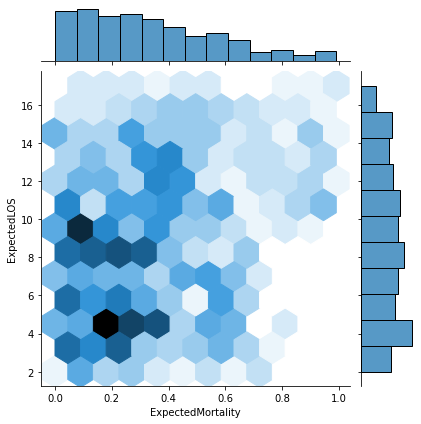

In [277]:
# draw jointplot with
# scatter kind
sns.jointplot(x = "ExpectedMortality", y = "ExpectedLOS",
              kind = "hex", data = df49D)

# show the plot
plt.show()

In [278]:
####################################### 50 ###############################################

In [279]:
# 50. Which departmentID has maximum number of visits scheduled

In [280]:
df50AV = AmbulatoryVisits_df

In [281]:
df50vs =df50AV.groupby("VisitDepartmentID")
df50vs

In [282]:
df50len= df50AV.groupby(["VisitDepartmentID"]).VisitID.agg([len])
df50len

,len
VisitDepartmentID,
1,51
2,51
3,51
4,51
5,92
6,92
7,93
8,93
9,79


In [283]:
df50len.loc[11]

len    102
Name: 11, dtype: int64

In [284]:
####################################### 51 ###############################################

In [285]:
# 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [29]:
df51AV = EDUnique_df

In [30]:
df51 = df51AV[(df51AV["PatientID"])  & (df51AV["ReasonForVisit"] == 'Migraine') & (df51AV["Acuity"] >= 2)]
df51

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [288]:
####################################### 52 ###############################################

In [289]:
# 52. Retrieve the row with minimum DBP using sorting technique

In [290]:
df52AV = AmbulatoryVisits_df 

In [291]:
df52sort= df52AV.sort_values(by=['BloodPressureDiastolic'], na_position='last')
df52sort

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.180570,7,Follow Up,120.0,51.695653,53.310495,Completed
456,32,35,32,2019-02-01,2019-01-14 23:07:20.014656,8,New,121.0,54.099878,80.480990,Completed
118,214,852,38,2019-03-31,2019-03-14 18:17:19.978922,10,Physical,123.0,54.285242,93.909856,No Show
231,909,860,3,2019-04-21,2019-04-12 20:49:25.742060,5,Telemedicine,122.0,56.594973,85.179520,Completed
545,372,557,3,2019-02-21,2019-02-13 13:05:43.262670,11,Follow Up,125.0,57.043944,73.071398,Completed
...,...,...,...,...,...,...,...,...,...,...,...
805,666,818,33,2019-02-09,2019-02-01 02:22:14.760665,10,Physical,NaN,NaN,NaN,Completed
807,555,72,35,2019-04-30,2019-04-02 08:38:32.356866,7,Follow Up,NaN,NaN,NaN,Completed
808,645,90,37,2019-03-16,2019-02-16 17:45:16.907732,1,Telemedicine,NaN,NaN,NaN,Completed
810,773,858,24,2019-03-12,2019-02-25 02:59:43.233029,2,Follow Up,NaN,NaN,NaN,Completed


In [292]:
df52=df52sort.iloc[0]
df52

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.180570
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object

In [293]:
####################################### 53 ###############################################bbb

In [294]:
# 53. Take the ReasonForVisit from user, 
# find the number of patients admitted with that ReasonForVisit

In [295]:
df53E = EDUnique_df

In [296]:
df53a = df53E.groupby("ReasonForVisit")
df53a

In [297]:
df53 = df53a['ReasonForVisit'].value_counts()
df53

ReasonForVisit       ReasonForVisit     
Accident             Accident                37
Bleeding             Bleeding                25
Car Accident         Car Accident            16
Chest Pain           Chest Pain              91
Fever                Fever                  172
Gun Shot             Gun Shot                16
Intoxication         Intoxication            23
Laceration           Laceration              22
Migraine             Migraine               116
Pneumonia            Pneumonia              171
Shortness of Breath  Shortness of Breath    120
Stomach Ache         Stomach Ache           136
Name: ReasonForVisit, dtype: int64

In [298]:
####################################### 54 ###############################################

In [299]:
# 54. Mortality O.E

In [300]:
df54D=  Discharges_df 

In [301]:
df54a= df54D.groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
df54a

,PrimaryDiagnosis,PatientID
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


In [302]:
df54a.rename(columns={"PatientID":"Total_count"},inplace = True)

In [303]:
df54b = df54D[(df54D.DischargeDisposition=='Expired')].groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
df54b

,PrimaryDiagnosis,PatientID
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


In [304]:
df54b.rename(columns={"PatientID":"Observed_Death_count"},inplace = True)

In [305]:
df54c = pd.merge(df54a,df54b, on = "PrimaryDiagnosis", how = 'left')

In [306]:
df54c ['Observed_Death_count'].fillna(value=0, inplace=True)

In [307]:
# Expected Mortality df
df54em =df54D.groupby(['PrimaryDiagnosis'],as_index=False)['ExpectedMortality'].mean()
df54em

,PrimaryDiagnosis,ExpectedMortality
0,AMI,0.235146
1,Afib,0.304235
2,Broken Leg,0.275440
3,Diabetes,0.286476
4,Fever,0.296601
5,Flu,0.272976
6,Heart Failure,0.385678
7,Hip Fracture,0.373310
8,Hypertension,0.296555
9,Kidney Failure,0.247592


In [308]:
#Merging to get Death count df
df54 = pd.merge(df54c ,df54em, on = "PrimaryDiagnosis", how = 'left')
df54

,PrimaryDiagnosis,Total_count,Observed_Death_count,ExpectedMortality
0,AMI,48,6.0,0.235146
1,Afib,11,4.0,0.304235
2,Broken Leg,9,3.0,0.275440
3,Diabetes,64,9.0,0.286476
4,Fever,19,4.0,0.296601
5,Flu,80,11.0,0.272976
6,Heart Failure,78,16.0,0.385678
7,Hip Fracture,23,3.0,0.373310
8,Hypertension,50,16.0,0.296555
9,Kidney Failure,20,2.0,0.247592


In [309]:
df54['Exp_Death_count']=df54['ExpectedMortality']*df54['Total_count']

In [310]:
df54['Morality_O:E']=df54['Observed_Death_count']/df54['Exp_Death_count']

In [311]:
df54

,PrimaryDiagnosis,Total_count,Observed_Death_count,ExpectedMortality,Exp_Death_count,Morality_O:E
0,AMI,48,6.0,0.235146,11.287028,0.531584
1,Afib,11,4.0,0.304235,3.346590,1.195246
2,Broken Leg,9,3.0,0.275440,2.478958,1.210186
3,Diabetes,64,9.0,0.286476,18.334439,0.490879
4,Fever,19,4.0,0.296601,5.635418,0.709796
5,Flu,80,11.0,0.272976,21.838083,0.503707
6,Heart Failure,78,16.0,0.385678,30.082879,0.531864
7,Hip Fracture,23,3.0,0.373310,8.586140,0.349400
8,Hypertension,50,16.0,0.296555,14.827774,1.079056
9,Kidney Failure,20,2.0,0.247592,4.951837,0.403891


In [312]:
####################################### 55 ###############################################

In [313]:
# 55. Create a bar chart on service & expected length of stay

In [314]:
df55D = Discharges_df 

<BarContainer object of 720 artists>

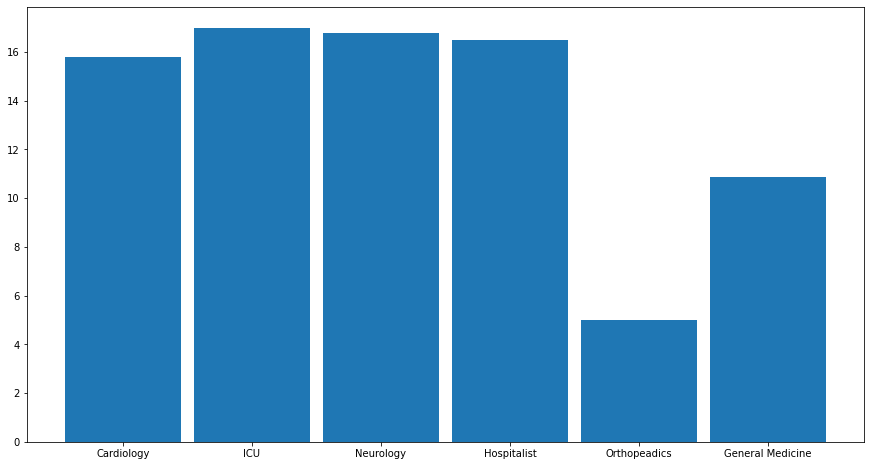

In [315]:
plt.figure(figsize = (15,8))
plt.bar(df55D['Service'], height = df55D['ExpectedLOS'], width = 0.9)

In [316]:
####################################### 56 ###############################################

In [317]:
# 56. Count of canceled status

In [318]:
df56AV = AmbulatoryVisits_df 

In [319]:
df56 = len(df56AV[df56AV['VisitStatus'] == 'Canceled'])
df56

60

In [320]:
####################################### 57 ###############################################

In [321]:
# 57. Find the age prone to get stroke

In [322]:
df57P=Patients_df

In [323]:
df57D =Discharges_df 

In [324]:
df57P['Date'] = pd.to_datetime(df57P.DateOfBirth)
df57P['Date']

0     1960-01-01 00:00:00.000000
1     1985-11-15 02:08:42.089852
2     1976-04-15 02:52:09.762384
3     1968-10-15 03:32:13.634776
4     1962-05-01 19:12:58.949547
                 ...            
940   1986-05-26 00:01:19.761035
941   1970-06-10 21:41:03.814278
942   1983-01-08 21:49:27.883969
943   1963-06-05 07:57:05.569185
944   1972-08-06 03:40:03.454345
Name: Date, Length: 945, dtype: datetime64[ns]

In [325]:
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [326]:
df57P['Date'].apply(lambda x: from_dob_to_age(x))

0      62
1      36
2      46
3      53
4      60
       ..
940    35
941    51
942    39
943    58
944    49
Name: Date, Length: 945, dtype: int64

In [327]:
df57a = df57P['Date'].apply(lambda x: from_dob_to_age(x))

In [328]:
df57P1=Patients_df

In [329]:
# adding age column to patients dataset.
df57P1['age']=df57a
df57P1

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,1960-01-01 00:00:00.000000,62
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,1985-11-15 02:08:42.089852,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,1976-04-15 02:52:09.762384,46
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,1968-10-15 03:32:13.634776,53
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,1962-05-01 19:12:58.949547,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761035,Male,Black/African-American,English,1986-05-26 00:01:19.761035,35
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814278,Male,Black/African-American,English,1970-06-10 21:41:03.814278,51
942,943,Diahann,Smeeton,1983-01-08 21:49:27.883969,Male,Black/African-American,English,1983-01-08 21:49:27.883969,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569185,Male,Black/African-American,English,1963-06-05 07:57:05.569185,58


In [330]:
df57b=df57D[df57D['PrimaryDiagnosis']=='Stroke']
df57b

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,LengthOS1
25,402,184,2018-01-14,2018-01-29,Expired,ICU,Stroke,13.910330,0.755644,15 days
32,267,203,2018-01-16,2018-01-23,Expired,Neurology,Stroke,14.274502,0.541246,7 days
38,327,288,2018-01-23,2018-02-08,Expired,Neurology,Stroke,9.115077,0.693990,16 days
44,27,335,2018-01-27,2018-02-11,Expired,Neurology,Stroke,10.516934,0.957984,15 days
58,177,409,2018-02-01,2018-02-08,Expired,Neurology,Stroke,11.360759,0.784439,7 days
...,...,...,...,...,...,...,...,...,...,...
689,22,277,2018-01-22,2018-02-06,Transfer,General Medicine,Stroke,10.206560,0.182587,15 days
690,23,280,2018-01-23,2018-01-29,Transfer,ICU,Stroke,14.499949,0.316988,6 days
691,24,291,2018-01-24,2018-01-30,Transfer,ICU,Stroke,11.178354,0.367017,6 days
692,25,303,2018-01-25,2018-01-30,Transfer,ICU,Stroke,12.294841,0.418960,5 days


In [331]:
df57=pd.merge(df57b, df57P1, on = "PatientID", how = "inner")

<AxesSubplot:ylabel='Frequency'>

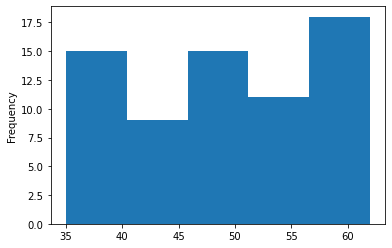

In [332]:
#histogram
df57['age'].plot(kind='hist',bins=5)

In [333]:
## Hence the people whose age is above 55 are prone to stroke.

In [334]:
####################################### 58 ###############################################

In [335]:
# 58. Display total count of patients service wise based on gender

In [336]:
df58D = Discharges_df

In [337]:
df58P = Patients_df

In [338]:
# Merging Discarges data with Patient's data to get gender

In [339]:
discarges_df_gender=pd.merge(df58D,df58P, on = "PatientID", how = 'inner')

In [340]:
df58 = discarges_df_gender.groupby(['Service','Gender'],as_index=False)['PatientID'].count()

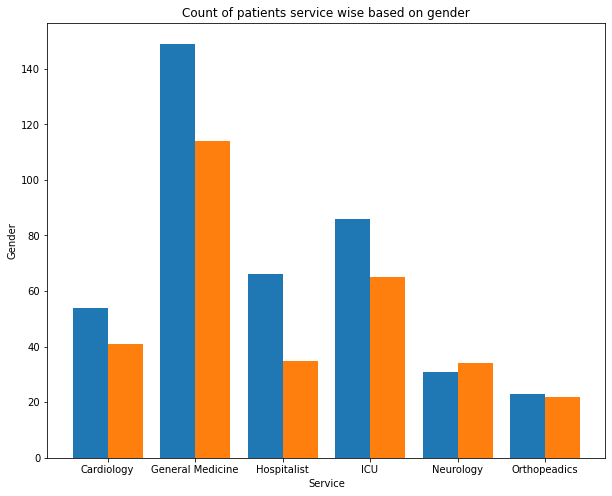

In [341]:
x=df58.Service.unique().tolist()
Male = df58.PatientID[df58.Gender=='Male'].tolist()
Female = df58.PatientID[df58.Gender=='Female'].tolist()
w=0.4
plt.figure(figsize = (10,8))
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1,Male,w,label="Male")
plt.bar(bar2,Female,w,label="Female")
plt.xlabel('Service')
plt.ylabel('Gender')
plt.title('Count of patients service wise based on gender')
plt.xticks(bar1+w/2,x)
plt.show()

In [342]:
####################################### 59 ###############################################

In [343]:
# 59. Create a dataframe by splitting provider name to 
# firstname and lastname with names for the columns

In [344]:
df59P = Providers_df

In [345]:
df59P.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.694860
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687282
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.298647
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.837733


In [346]:
#New data frame with split value columns
df59P[['ProviderFirstName','ProviderLastName']] = df59P["ProviderName"].str.split(" ", expand=True)
df59P


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,ProviderFirstName,ProviderLastName
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.694860,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687282,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.298647,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.837733,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.309747,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.758788,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.538600,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211400,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.793886,Fred,Man


In [347]:
####################################### 60 ###############################################

In [348]:
# # 60. "Predict the output of the program..
# class Acc: 
# def __init__(self, id): 
# self.id = id
# id = 555 

# acc = Acc(111) 
# print(acc.id)
# "

In [349]:
# Prediction: Since we are passing value 111 while creating obj of class Acc, 
## it has more priority. so 111 will display

class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 

acc = Acc(111) 
print(acc.id)

111


In [350]:
####################################### End of 41-60 ####################################################

In [351]:
### 61.  Show a graph by multiplotting on the same canvas . (Take any set of x & y values)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


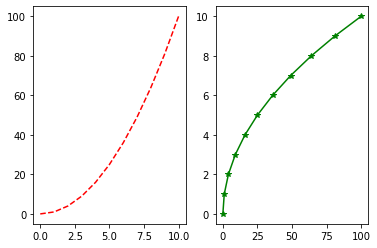

In [352]:
# plt.subplot(nrows, ncols, plot_number)
x = np.linspace(0, 10, 11)
print(x)
type(x)
y = x ** 2
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

### 62 . Display the data for all 'White Female' patients above the age of 50

In [375]:
# Retrieving the patients data table 
   
Patients_df = pd.read_excel("HospitalDatabase.xlsx","Patients")
Patients_df.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English


In [376]:
Patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    int64         
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 51.8+ KB


In [377]:
Patients_df['Date'] = pd.to_datetime(Patients_df.DateOfBirth)
Patients_df['Date']

0     1960-01-01 00:00:00.000000
1     1985-11-15 02:08:42.089852
2     1976-04-15 02:52:09.762384
3     1968-10-15 03:32:13.634776
4     1962-05-01 19:12:58.949547
                 ...            
940   1986-05-26 00:01:19.761035
941   1970-06-10 21:41:03.814278
942   1983-01-08 21:49:27.883969
943   1963-06-05 07:57:05.569185
944   1972-08-06 03:40:03.454345
Name: Date, Length: 945, dtype: datetime64[ns]

In [378]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [379]:
Patients_df['Date'].apply(lambda x: from_dob_to_age(x))

0      62
1      36
2      46
3      53
4      60
       ..
940    35
941    51
942    39
943    58
944    49
Name: Date, Length: 945, dtype: int64

In [380]:
df1 = Patients_df['Date'].apply(lambda x: from_dob_to_age(x))
print(type(df1))

<class 'pandas.core.series.Series'>


In [381]:
df2 = df1.to_frame()
Patients_df['age'] = df2

In [382]:
Patients_df 

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,1960-01-01 00:00:00.000000,62
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,1985-11-15 02:08:42.089852,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,1976-04-15 02:52:09.762384,46
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,1968-10-15 03:32:13.634776,53
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,1962-05-01 19:12:58.949547,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761035,Male,Black/African-American,English,1986-05-26 00:01:19.761035,35
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814278,Male,Black/African-American,English,1970-06-10 21:41:03.814278,51
942,943,Diahann,Smeeton,1983-01-08 21:49:27.883969,Male,Black/African-American,English,1983-01-08 21:49:27.883969,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569185,Male,Black/African-American,English,1963-06-05 07:57:05.569185,58


In [383]:
# filter dataframe 
df_age = display(Patients_df[(Patients_df["Gender"]=="Female") &  (Patients_df["Race"] == "White")  & (Patients_df["age"] > 50)])
df_age

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,age
28,29,Ted,Scott,1967-12-09 05:01:37.891917,Female,White,Spanish,1967-12-09 05:01:37.891917,54
30,31,Harry,Ding,1960-10-08 01:42:51.211939,Female,White,Spanish,1960-10-08 01:42:51.211939,61
33,34,Ted,Hue,1960-11-28 18:05:11.458668,Female,White,Spanish,1960-11-28 18:05:11.458668,61
34,35,Fred,Tye,1966-04-14 06:01:07.169496,Female,White,Spanish,1966-04-14 06:01:07.169496,56
44,45,Barret,Doubrava,1962-10-18 08:23:23.478175,Female,White,Spanish,1962-10-18 08:23:23.478175,59
...,...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100093,Female,White,English,1960-12-01 13:16:18.100093,61
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933160,Female,White,English,1970-12-09 04:49:48.933160,51
866,867,Gail,Inc,1967-03-10 08:18:47.907744,Female,White,English,1967-03-10 08:18:47.907744,55
867,868,Des,Heindrick,1969-08-15 11:05:30.164569,Female,White,English,1969-08-15 11:05:30.164569,52


### 63. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200


In [364]:
# 
Patients_df_name = Patients_df.loc[101:200, ['PatientID', 'FirstName' , 'LastName']]
Patients_df_name

,PatientID,FirstName,LastName
101,102,Gipsy,Frankton
102,103,Jethro,Wharin
103,104,Viv,Aylward
104,105,Swift,Dreschler
105,106,Fadel,Jacquemard
...,...,...,...
196,197,Noam,Laguerre
197,198,Arie,Bayless
198,199,Janaye,O'Mohun
199,200,Fonz,Group


### 64.  Using numpy functions, multiply the following arrays

In [384]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)

In [385]:
a=np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [386]:
a.shape

(2, 3)

In [387]:
b=np.arange(6).reshape(3,2)
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [388]:
b.shape

(3, 2)

In [389]:
## Returns the scalar or dot product of two arrays
print(np.dot(a,b))

[[10 13]
 [28 40]]


In [390]:
## The matmul() function gives us the matrix product of two 2-d arrays.
print(np.matmul(a,b))

[[10 13]
 [28 40]]


### 65. Get the count of number of patients based on service and primary diagnosis

In [373]:
# Count of patients using groupby
ReAdmission_df.groupby(["Service", "PrimaryDiagnosis"])["PatientID"].count()

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

###  66 . np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30

In [391]:
 np.arange(1,31)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [392]:
x = np.arange(1,31).reshape(6,5)
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [393]:
print(x[0,3:])

[4 5]


In [394]:
print(x[4,3:])


[24 25]


In [395]:
print(x[5,3:])

[29 30]


In [396]:
## Second method
listing = np.arange(1,31).reshape(6,5)
#print(listing[0,3:])
print(listing[[0,0,4,4,5,5],[3,4,3,4,3,4]])

[ 4  5 24 25 29 30]


###  67. Make a pivot table by counts the no. of patients from the admission date till discharge date
 

In [31]:
Discharges_df['Discharge_date']=Discharges_df['DischargeDate'].dt.date

Discharges_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [400]:
Discharges_df.pivot_table(values='PatientID', index = 'AdmissionDate', 
                     columns= 'Discharge_date', aggfunc= 'count',dropna=True)

KeyError: 'Discharge_date'

### 68. Display the data where actual LOS is greater than expected LOS


In [402]:
# Check the format of the data
ReAdmission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AdmissionID                720 non-null    int64         
 1   PatientID                  720 non-null    int64         
 2   AdmissionDate              720 non-null    datetime64[ns]
 3   DischargeDate              720 non-null    datetime64[ns]
 4   DischargeDisposition       720 non-null    object        
 5   Service                    720 non-null    object        
 6   PrimaryDiagnosis           720 non-null    object        
 7   ExpectedLOS                720 non-null    float64       
 8   ExpectedMortality          720 non-null    float64       
 9   ReadmissionFlag            194 non-null    float64       
 10  DaysToReadmission          194 non-null    float64       
 11  EDVisitAfterDischargeFlag  341 non-null    float64       
dtypes: datet

In [403]:
# Converting the datetime format to float 

ReAdmission_df['ACTUAL_LOS'] = (ReAdmission_df['DischargeDate'].dt.day)- (ReAdmission_df['AdmissionDate'].dt.day)
ReAdmission_df.head()
# Check the format of the data
ReAdmission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AdmissionID                720 non-null    int64         
 1   PatientID                  720 non-null    int64         
 2   AdmissionDate              720 non-null    datetime64[ns]
 3   DischargeDate              720 non-null    datetime64[ns]
 4   DischargeDisposition       720 non-null    object        
 5   Service                    720 non-null    object        
 6   PrimaryDiagnosis           720 non-null    object        
 7   ExpectedLOS                720 non-null    float64       
 8   ExpectedMortality          720 non-null    float64       
 9   ReadmissionFlag            194 non-null    float64       
 10  DaysToReadmission          194 non-null    float64       
 11  EDVisitAfterDischargeFlag  341 non-null    float64       
 12  ACTUAL_L

In [404]:
# Applying condition on rows using DataFrame.loc[] method

ReAdmission_df.loc[(ReAdmission_df['ACTUAL_LOS'] > ReAdmission_df['ExpectedLOS'])]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,ACTUAL_LOS
3,587,5,2018-01-01,2018-01-05 05:47:04.932834,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,4
10,568,12,2018-01-01,2018-01-09 09:21:47.300098,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,8
11,107,13,2018-01-01,2018-01-09 21:34:42.467216,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,8
14,305,15,2018-01-01,2018-01-10 17:24:37.526177,Home,Hospitalist,Hypertension,6.369161,0.646007,NaN,NaN,NaN,9
16,439,17,2018-01-01,2018-01-12 14:16:51.023521,Home,Hospitalist,Kidney Failure,8.357081,0.630937,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,720,678,2018-02-20,2018-02-27 09:27:47.105465,Transfer,Hospitalist,Diabetes,5.270810,0.256995,NaN,NaN,NaN,7
659,51,679,2018-02-20,2018-02-27 16:26:33.881663,Home,General Medicine,Fever,6.256772,0.426743,NaN,NaN,NaN,7
660,525,680,2018-02-20,2018-02-28 20:26:23.756604,Home,Orthopeadics,Knee Replacement,3.918134,0.751730,NaN,NaN,NaN,8
681,105,702,2018-02-21,2018-02-26 19:49:12.007603,Home,Orthopeadics,Hip Fracture,3.187702,0.498555,NaN,NaN,NaN,5


### 69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive


In [405]:
Patients_df['flag'] = Patients_df['LastName'].str.contains('lau',case=False)| Patients_df['FirstName'].str.contains('lau',case=False)
display(Patients_df[(Patients_df['flag']==True)])

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,age,flag
282,283,Lauren,Gaskal,1962-05-08 01:54:00.110977,Female,Black/African-American,English,1962-05-08 01:54:00.110977,60,True
322,323,Lauren,Foort,1960-06-23 20:07:53.045362,Female,White,English,1960-06-23 20:07:53.045362,61,True
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.390747,Female,White,English,1982-12-17 16:27:56.390747,39,True
382,383,Zulauf,LLC,1969-03-16 07:48:49.338305,Female,White,English,1969-03-16 07:48:49.338305,53,True
454,455,Zulauf,Alvar,1961-10-02 08:24:17.333667,Female,White,English,1961-10-02 08:24:17.333667,60,True
463,464,Zulauf,Manske,1965-06-22 02:49:28.667315,Female,White,English,1965-06-22 02:49:28.667315,56,True
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635459,Female,White,English,1967-04-02 07:17:53.635459,55,True
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.987735,Female,White,English,1970-05-17 08:09:28.987735,52,True
850,851,Lemmy,Klausen,1973-06-18 06:19:43.474663,Female,White,English,1973-06-18 06:19:43.474663,48,True
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870407,Male,Black/African-American,English,1979-09-04 13:05:57.870407,42,True


### 70. Plot a graph to show the distribution of expected mortality



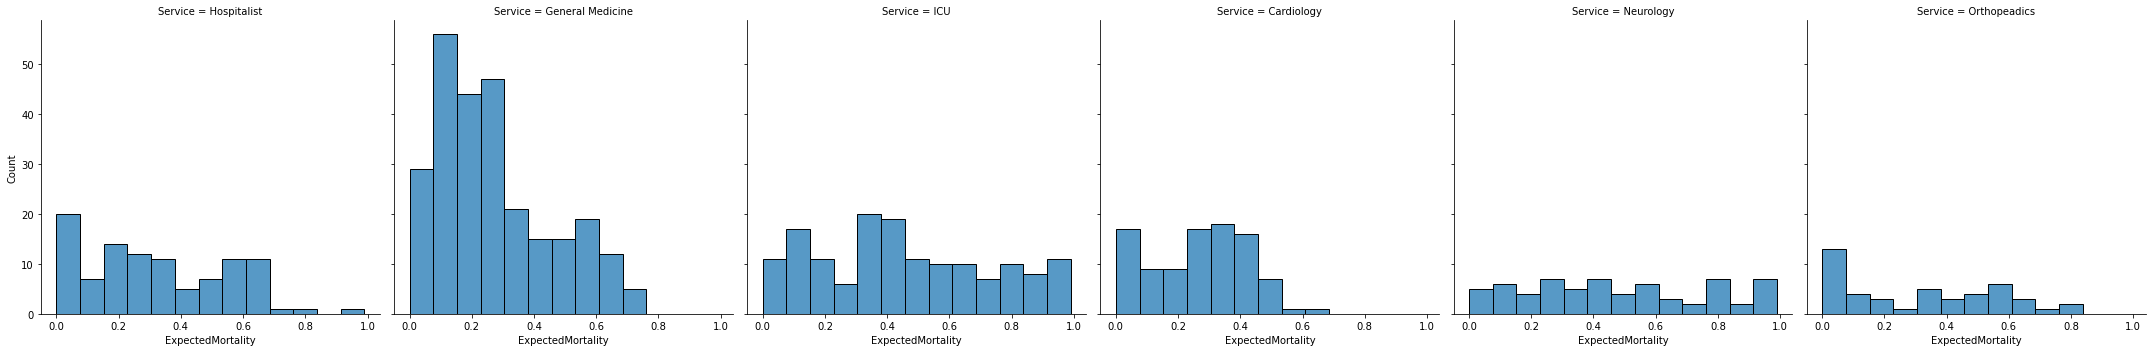

In [409]:
sns.displot(ReAdmission_df, x="ExpectedMortality",col="Service")

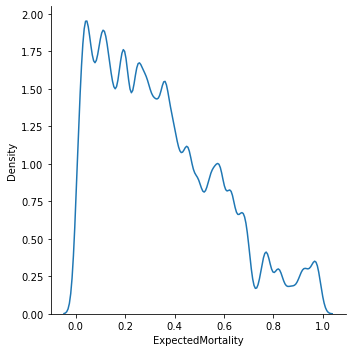

In [410]:
sns.displot(ReAdmission_df, x="ExpectedMortality",kind="kde",bw_adjust=.25)

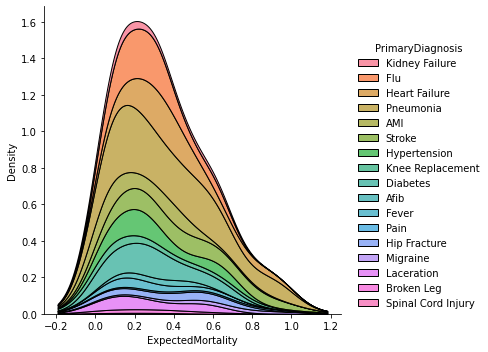

In [411]:
sns.displot(ReAdmission_df, x="ExpectedMortality",hue="PrimaryDiagnosis",kind="kde",multiple="stack")

### 71. Create a visualization on the count the no. of patients based on primary diagnosis


In [412]:
# groupby() method worth mentioning is agg(), which lets you run a bunch of different 
# functions on your DataFrame simultaneously. For example, we can generate a simple statistical
# summary of the dataset as follows:
    
ReAdmission_df.groupby(['PrimaryDiagnosis']).PatientID.agg([len])

,len
PrimaryDiagnosis,
AMI,48
Afib,11
Broken Leg,9
Diabetes,64
Fever,19
Flu,80
Heart Failure,78
Hip Fracture,23
Hypertension,50


<AxesSubplot:title={'center':' no. of patients based on primary diagnosis'}, xlabel='PrimaryDiagnosis', ylabel='PatientID Count'>

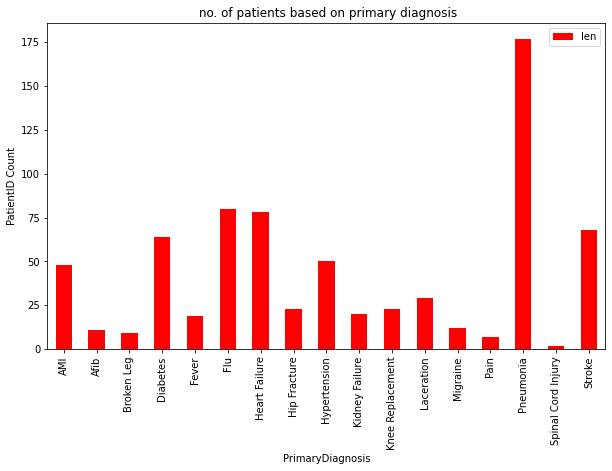

In [413]:
import matplotlib.pyplot as plt

ReAdmission_df.groupby(['PrimaryDiagnosis']).PatientID.agg([len]).plot(kind='bar',color=['r'],
                                        title =' no. of patients based on primary diagnosis',
                                                             ylabel = 'PatientID Count',
                                                             xlabel = 'PrimaryDiagnosis',
                                                             figsize=(10,6))


### 72. List male patients over the age of 60 who have undergone surgery from January-March 2019


In [414]:
# We need two tables here:
Patients_df = pd.read_excel("HospitalDatabase.xlsx" , "Patients" )
AmbulatoryVisits_df = pd.read_excel("HospitalDatabase.xlsx" , "AmbulatoryVisits" )
Providers_df = pd.read_excel("HospitalDatabase.xlsx" , "Providers" )

In [415]:
# Merge df_ambulatoryVisits and df_providers  on 'ProviderID'

df_merge_1 = pd.merge(AmbulatoryVisits_df, Providers_df , on='ProviderID', how='left') 

In [416]:
# Merge df_merge_1 and df_patients  on 'PatientMRN' and 'PatientID'

df_merge_2 = pd.merge(df_merge_1, Patients_df , how='left', left_on='PatientMRN',right_on='PatientID')

In [417]:
df_merge_2['Date'] = pd.to_datetime(df_merge_2.DateOfBirth)

In [418]:
# Retrieving age from DOB
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [419]:
df_merge_2['Date'].apply(lambda x: from_dob_to_age(x))

0      39
1      48
2      53
3      45
4      40
       ..
945    45
946    60
947    61
948    42
949    54
Name: Date, Length: 950, dtype: int64

In [420]:
df1 = df_merge_2['Date'].apply(lambda x: from_dob_to_age(x))

In [421]:
df2 = df1.to_frame()
df_merge_2['Age'] = df2

In [422]:
df_merge_2.loc[(df_merge_2['Gender'] == 'Male') & (df_merge_2['Age']> 60) & (df_merge_2['ProviderSpecialty'] == 'Surgery') & (df_merge_2['DateofVisit'].between('2019-01-01','2019-03-31', inclusive=False)) & (df_merge_2['VisitStatus'] == "Completed") ]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,...,ProviderDateOnStaff,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,Age
475,380,581,11,2019-03-01,2019-02-11 07:28:05.540888,7,Telemedicine,179.0,113.061708,84.869647,...,1998-05-10 14:47:29.467881,581,Constanta,Edgin,1960-06-06 08:19:25.533861,Male,Black/African-American,English,1960-06-06 08:19:25.533861,61
639,16,19,16,2019-01-16,2018-12-17 13:57:08.056261,4,New,131.0,64.484534,72.506395,...,2001-02-13 11:49:17.861599,19,Daugherty,Conner,1960-04-04 10:00:34.189324,Male,White,Spanish,1960-04-04 10:00:34.189324,62
725,164,802,12,2019-02-09,2019-01-16 17:53:41.867193,8,Follow Up,NaN,NaN,NaN,...,1998-08-18 05:22:40.762080,802,Berta,Loxly,1961-05-19 21:00:01.885207,Male,White,English,1961-05-19 21:00:01.885207,61


### 73. Delete the column 'DischargeDispostion' iteratively


In [425]:
Discharges_df = pd.read_excel("HospitalDatabase.xlsx" , "Discharges")

In [426]:
# Deleting columns using del and for loop

for col in Discharges_df .columns:
    if 'DischargeDisposition' in col:
        del Discharges_df [col] 
        
Discharges_df.head()
    

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.407668,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667389,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782009,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.133666,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.156712,Cardiology,Broken Leg,2.639297,0.055468


### 74. Get the list of ReasonForVisit


In [427]:
# Finding the list of unique values in the column ReasonForVisit
print(sorted(EDVisits_df['ReasonForVisit'].unique()))

['Accident', 'Bleeding', 'Car Accident', 'Chest Pain', 'Cough', 'Fever', 'Gun Shot', 'Intoxication', 'Laceration', 'Migraine', 'Pneumonia', 'Shortness of Breath', 'Stomach Ache']


### 75. Calculate the time spent in ED Department for each visit


In [429]:
EDVisits_df['time_diff'] = (EDVisits_df['EDDischargeTime'] - EDVisits_df['VisitDate'])
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,time difference,time_diff
0,1,1,2020-01-01 00:00:00.000000,2020-01-01 11:20:22.924037,1,Stomach Ache,1,11.339701,0 days 11:20:22.924037
1,12,12,2020-01-01 02:45:40.302013,2020-01-02 02:00:00.517383,2,Migraine,1,23.238949,0 days 23:14:20.215370
2,13,13,2020-01-01 03:09:24.700930,2020-01-01 05:00:20.852112,3,Stomach Ache,1,1.848931,0 days 01:50:56.151182
3,14,14,2020-01-01 03:12:19.349207,2020-01-01 04:32:29.141770,3,Migraine,1,1.336053,0 days 01:20:09.792563
4,15,15,2020-01-01 03:46:32.697853,2020-01-01 06:24:52.740662,3,Chest Pain,1,2.638901,0 days 02:38:20.042809
...,...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.569997,2020-01-16 02:31:52.023450,4,Chest Pain,0,15.885959,0 days 15:53:09.453453
1195,1186,932,2020-01-15 11:52:37.540239,2020-01-16 10:19:41.569517,1,Pneumonia,0,22.451119,0 days 22:27:04.029278
1196,1187,933,2020-01-15 12:11:11.677812,2020-01-15 16:41:15.222748,1,Pneumonia,0,4.500985,0 days 04:30:03.544936
1197,1188,934,2020-01-15 12:21:46.005588,2020-01-15 18:32:21.059715,1,Pneumonia,0,6.176404,0 days 06:10:35.054127


In [430]:
# in hrs:
EDVisits_df['time_diff_in_hr'] = EDVisits_df['time_diff'].astype('timedelta64[h]')['time_diff_in_hr'] = EDVisits_df['time_diff'].astype('timedelta64[h]')
EDVisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,time difference,time_diff,time_diff_in_hr
0,1,1,2020-01-01 00:00:00.000000,2020-01-01 11:20:22.924037,1,Stomach Ache,1,11.339701,0 days 11:20:22.924037,11.0
1,12,12,2020-01-01 02:45:40.302013,2020-01-02 02:00:00.517383,2,Migraine,1,23.238949,0 days 23:14:20.215370,23.0
2,13,13,2020-01-01 03:09:24.700930,2020-01-01 05:00:20.852112,3,Stomach Ache,1,1.848931,0 days 01:50:56.151182,1.0
3,14,14,2020-01-01 03:12:19.349207,2020-01-01 04:32:29.141770,3,Migraine,1,1.336053,0 days 01:20:09.792563,1.0
4,15,15,2020-01-01 03:46:32.697853,2020-01-01 06:24:52.740662,3,Chest Pain,1,2.638901,0 days 02:38:20.042809,2.0
...,...,...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.569997,2020-01-16 02:31:52.023450,4,Chest Pain,0,15.885959,0 days 15:53:09.453453,15.0
1195,1186,932,2020-01-15 11:52:37.540239,2020-01-16 10:19:41.569517,1,Pneumonia,0,22.451119,0 days 22:27:04.029278,22.0
1196,1187,933,2020-01-15 12:11:11.677812,2020-01-15 16:41:15.222748,1,Pneumonia,0,4.500985,0 days 04:30:03.544936,4.0
1197,1188,934,2020-01-15 12:21:46.005588,2020-01-15 18:32:21.059715,1,Pneumonia,0,6.176404,0 days 06:10:35.054127,6.0


### 76.Reverse the string without using inbuilt functions


In [ ]:
# Method 1: 

#user-defined function
def findReverse(string):
   # find reverse of string
   reverse = string[::-1]
   return reverse

# take inputs
string = input('Enter the string: ')

# calling function and display result
reverse = findReverse(string)
print('The reverse string is', reverse)

In [ ]:
# Method 2:
Patients_df = pd.read_excel("HospitalDatabase.xlsx" , "Patients" )

In [ ]:
# x[::-1]  is used to reverse the string of the column in pandas along with the apply function as shown below

Patients_df['First_Name'] = Patients_df.loc[:,'FirstName'].apply(lambda x: x[::-1])
Patients_df.head()

### 77. Create a bar chart by making list on Acuity & EDDischarge column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method


In [ ]:
EDVisits_df['EDDischargeTime'].min()

In [ ]:
EDVisits_df['EDDischargeTime'].max()

In [ ]:
x_Eddis = EDVisits_df['EDDischargeTime'].unique().tolist()

In [ ]:
y_Acuity = EDVisits_df["Acuity"].unique().tolist()

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(np.random.rand(5, 2), columns=['x_Eddis', 'y_Acuity'])
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()

### 78 . Find reasonForVisit with highest count of acuity 5 patients


In [ ]:
acuity_5 = EDVisits_df.groupby(['ReasonForVisit']).apply(lambda x: x[x['Acuity'] == 5]['Acuity'].count())
print(acuity_5)

In [ ]:
acuity_5.nlargest(1)

### 79.  Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [ ]:
ReAdmission_df['ExpectedLOS'].describe()

In [ ]:
PrimaryDiagnosis=ReAdmission_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda x: (x.max() - x.min()))

In [ ]:
PrimaryDiagnosis.nlargest(1)

### 80. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)


In [ ]:
# Method 1:
Providers_df.groupby('ProviderSpecialty').agg(list)

In [ ]:
# Method 2:

Providers_df.groupby('ProviderSpecialty').size().reset_index().rename(columns={0:'Providers Count'})


### 81. Display full name of patients
 

In [85]:
# Displaying full name using FirstName and LastName columns

Patients_df['FullName'] = Patients_df[["FirstName","LastName" ]].agg(' '.join, axis = 1)
display(Patients_df['FullName'])

0             Lanni Sue
1             Far Myers
2       Devlin  Michael
3         Carmine Texas
4            Tann  Bama
             ...       
940         Wat Fideler
941     Wandie Baythrop
942     Diahann Smeeton
943    Panchito Sharple
944        Walsh Calvie
Name: FullName, Length: 945, dtype: object

### 82. Retrieve the rows where SBP<140 and DBP<80


In [87]:
# It will return following DataFrame object in which BloodPressureSystolic column  contains value  < 140 and 
# BloodPressureDiastolic column  contains value  < 80

df_bp = AmbulatoryVisits_df[(AmbulatoryVisits_df["BloodPressureSystolic"] < 140) & (AmbulatoryVisits_df["BloodPressureDiastolic"] < 80)]
df_bp

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091454,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.778830,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.574623,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145258,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.765682,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.986965,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.831764,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.543549,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.867616,2,Physical,121.0,64.896818,68.496869,Canceled


### 83.Create the plot where x= np.arange(0, 10, 0.1) and y= np.sin(np.pi * x) + x by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]
 

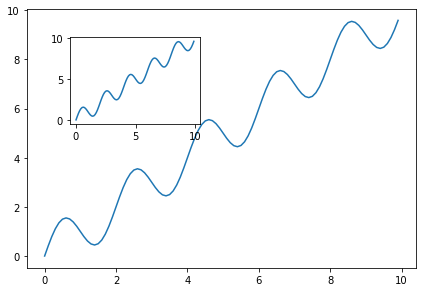

In [83]:
fig = plt.figure()
x= np.arange(0, 10, 0.1)
y= np.sin(np.pi * x) + x
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes1 = fig.add_axes([0.2,0.6,0.3,0.3])
axes.plot(x,y)
axes1.plot(x,y)
plt.show()

### 84. Find the list of patients whose ExpectedLOS is greater than the value given by the user


In [82]:
Readmission_df = pd.read_excel("HospitalDatabase.xlsx",'ReAdmissionRegistry')
Patients_df = pd.read_excel('HospitalDatabase.xlsx','Patients')

def patient_details(num1):
    Readmission_id = Readmission_df['PatientID'][Readmission_df.ExpectedLOS>= num1]
    Patient_details =(Patients_df['FirstName'] +' '+ Patients_df['LastName'])[Patients_df.PatientID.isin(Readmission_id)]
    return Patient_details
num1 = int(input("Please enter the number :"))
patient_details(num1)

Please enter the number :8


5        Jerrilyn  Kane
6           Skipton Bar
7       Alexandra Green
8         Devlin  Black
9            Granny Man
             ...       
732      Larissa Gillam
734       Hahn Monnoyer
736        Myrah Hegley
737    Konopelski Group
738       Chandal Group
Length: 393, dtype: object

### 85.Find count of Black/African American, English Females


In [ ]:
df_data = Patients_df.groupby(["Gender", "Race","Language"]).get_group(("Female","White","English"))

In [ ]:
df_count =Patients_df.groupby(["Gender", "Race","Language"]).get_group(("Female","White","English"))['PatientID'].count()
df_count